<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Natural-Language-Processing/blob/main/Anushka_505_Lab7(LLM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [ ]:
!pip install -q streamlit
!pip install -U "transformers==4.40.0" --upgrade
!pip install accelerate bitsandbytes
!npm install localtunnel
!pip install pix2text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 60.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl

In [ ]:
!pip install accelerate
!pip install -i https://pypi.org/simple/ bitsandbytes

Looking in indexes: https://pypi.org/simple/


In [ ]:
import urllib

In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image
from pix2text import Pix2Text
import transformers
import torch

# Initialize Pix2Text
p2t = Pix2Text.from_config()

# Load model and tokenizer
model_id = "unsloth/llama-3-8b-Instruct-bnb-4bit"

tokenizer = transformers.AutoTokenizer.from_pretrained(model_id)

# Title
st.title("Tokenize and Encode Extracted Text")

# Description
st.write("""
This application uses Pix2Text to convert an image into text, tokenizes the extracted text, and encodes it to get the corresponding token IDs.
You can upload an image below to see the tokens along with their encoded values.
""")

# Prompt for image upload
st.write("Upload your image containing mathematical text")

# Create a file uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Open the image using PIL
    img = Image.open(uploaded_file)

    # Run the image through Pix2Text model to extract text
    extracted_text = p2t.recognize_text_formula(img)

    st.write("Extracted Text:")
    st.write(extracted_text)

    # Tokenize the extracted text
    tokens = tokenizer.tokenize(extracted_text)

    # Encode the tokens to get token IDs
    encoded = tokenizer.convert_tokens_to_ids(tokens)

    # Display the tokens and their corresponding encoded values
    st.write("Tokenized Text with Encoded IDs:")
    for token, token_id in zip(tokens, encoded):
        st.write(f"Token: {token} \t Encoded ID: {token_id}")

    # Optionally, display a list of all tokens and IDs at once
    st.write("Full Tokenized Output:")
    st.write(tokens)
    st.write("Encoded IDs:")
    st.write(encoded)

Overwriting app.py


In [ ]:
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 35.194.234.197


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.194.234.197:8501

your url is: https://large-pears-obey.loca.lt
  Stopping...
^C


**Snapshots of the Application**

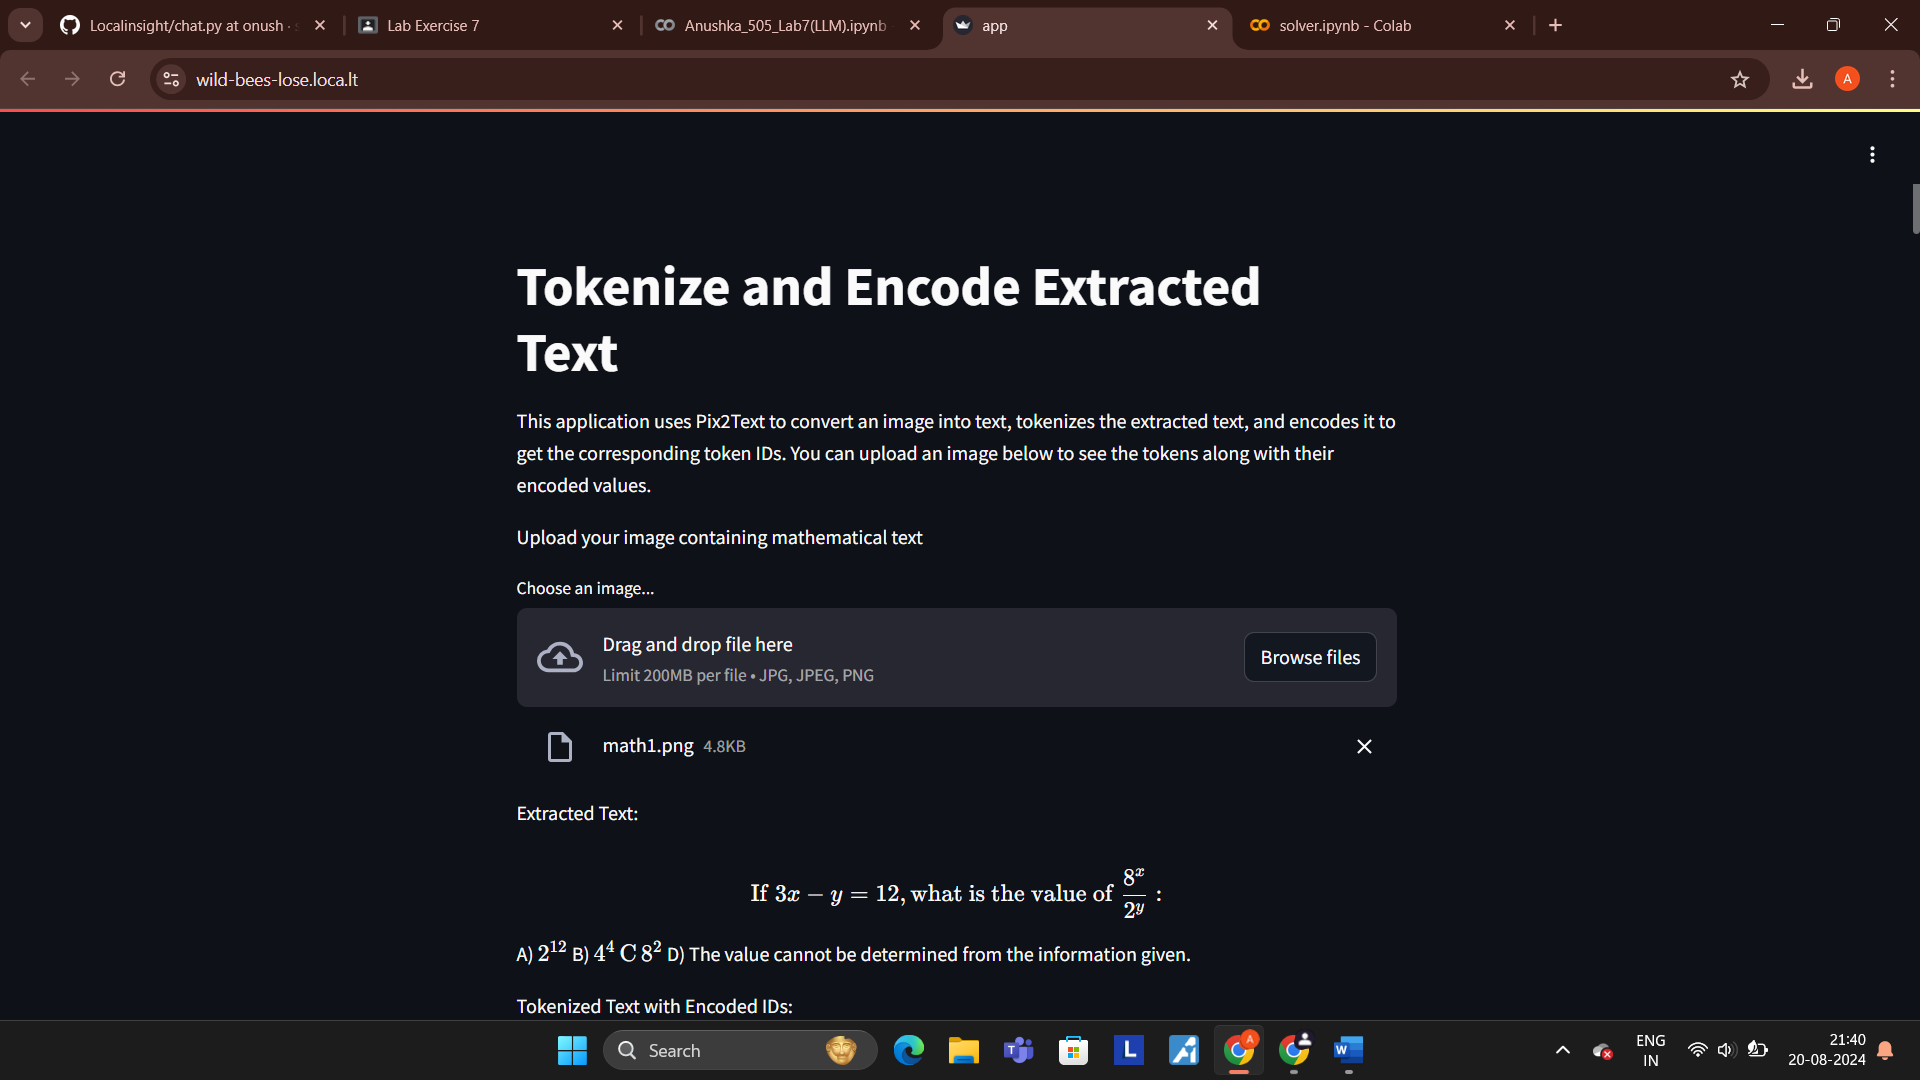


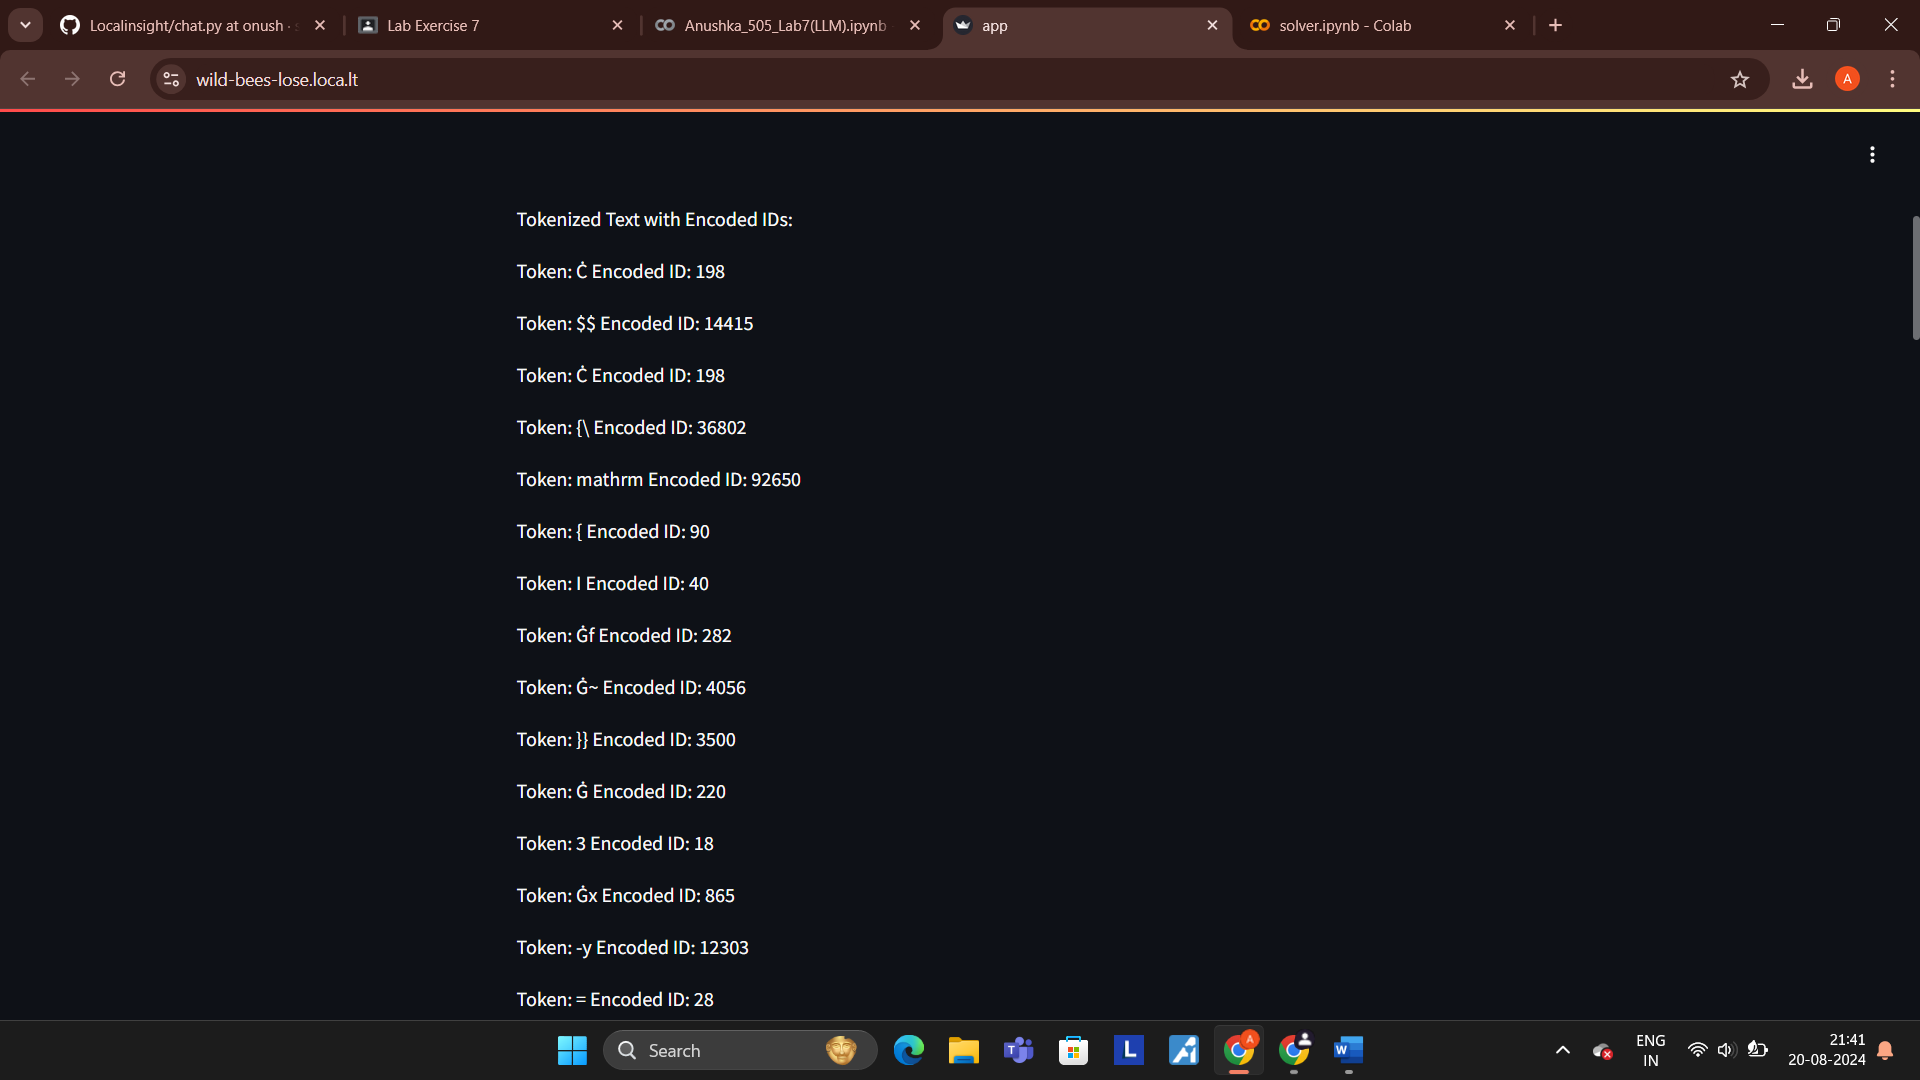